In [53]:
from glob import glob
from os.path import basename
from matplotlib import pyplot as plt
from xarray import open_dataset
import numpy as np
import os
import xarray as xr

In [62]:
#...........................
def load_pl_netcdf_file(path, levels, timespan, lfs):

        # Load all netcdf files in a givend dir.
        L = []
        for pl in levels:
            D = []
            for f in lfs:
                # Read netcdf file and extract precipitation fields
                print('Loading:', f)
                #print(self.dir_path, self.dataset, self.variable, f, "")
                #path = os.path.join(self.dir_path, self.dataset, self.variable, self.part, f)
                #print(path)
                ds = xr.open_dataset(path + f, engine='netcdf4')

                if not levels:
                    da = ds
                else:
                    da = ds.isel(level=pl)
                    #da = ds.isel(pressure=pl)
                    print('Loading levels: ', pl)
                    dai= da.sel(time=da.time.dt.month.isin(timespan))
                    print('Selected data', dai)
                D.append(dai)
                ds.close()

            print('D list:', D[:3])
            X = xr.concat(D, dim='time')
            print('Concat: ', X)
            L.append(X)
        #Z = xr.align(L[0],L[1])
        return L

#...........................
def extract_region(da, region):
        #if R == '':
            # slice lon and lat variables and all variables are sliced automatically
            #D = da.sel(lon=slice(self.region['lonx'], self.region['lony']), lat=slice(self.region['latx'], self.region['laty']))
        D = da.sel(longitude=slice(region['lonx'], region['lony']), latitude=slice(region['latx'], region['laty']))
        #else:
            # slice lon and lat variables and all variables are sliced automatically
        #D = da.sel(longitude=slice(R['lonx'], R['lony']), latitude=slice(R['latx'], R['laty']))

        print('DDDDDDDDDDD', D)
        return D


In [55]:
dir_path = r"/Volumes/TOSHIBA EXT/public_reanalysis_datasets/ERA5_1940_2019/ERA5/u/1/"
#l_files = [os.path.basename(x) for x in glob.glob(dir_path + '*.nc')]
pattern='*.nc'
l_files = [basename(x) for x in glob(dir_path + pattern)]
print(l_files)

['era5_monthly_u_1940.nc', 'era5_monthly_u_1941.nc', 'era5_monthly_u_1942.nc', 'era5_monthly_u_1943.nc', 'era5_monthly_u_1944.nc', 'era5_monthly_u_1945.nc', 'era5_monthly_u_1946.nc', 'era5_monthly_u_1947.nc', 'era5_monthly_u_1948.nc', 'era5_monthly_u_1949.nc', 'era5_monthly_u_1950.nc', 'era5_monthly_u_1952.nc', 'era5_monthly_u_1953.nc', 'era5_monthly_u_1954.nc', 'era5_monthly_u_1955.nc', 'era5_monthly_u_1956.nc', 'era5_monthly_u_1957.nc', 'era5_monthly_u_1958.nc', 'era5_monthly_u_1959.nc', 'era5_monthly_u_1960.nc', 'era5_monthly_u_1961.nc', 'era5_monthly_u_1962.nc', 'era5_monthly_u_1963.nc', 'era5_monthly_u_1964.nc', 'era5_monthly_u_1965.nc', 'era5_monthly_u_1967.nc', 'era5_monthly_u_1968.nc', 'era5_monthly_u_1969.nc', 'era5_monthly_u_1970.nc', 'era5_monthly_u_1971.nc', 'era5_monthly_u_1972.nc', 'era5_monthly_u_1973.nc', 'era5_monthly_u_1974.nc', 'era5_monthly_u_1975.nc', 'era5_monthly_u_1976.nc', 'era5_monthly_u_1977.nc', 'era5_monthly_u_1978.nc', 'era5_monthly_u_1951.nc', 'era5_month

In [56]:
len(l_files)

39

In [57]:
levels = [0]
jjas = [1,2,3,4,5,6,7,8,9,10,11,12]
data = load_pl_netcdf_file(dir_path, levels, jjas, l_files[:3])

Loading: era5_monthly_u_1940.nc
Loading levels:  0
Selected data <xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 200
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 1940-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-31 00:12:15 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
Loading: era5_monthly_u_1941.nc
Loading levels:  0
Selected data <xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 200
  * time       (time) datetime64[ns] 1941-01-01 1941-02-01 ..

In [58]:
len(data)

1

In [59]:
data[0]

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 36)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      int32 200
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 1942-12-01
Data variables:
    u          (time, latitude, longitude) float32 -4.196e-05 ... 0.0008373
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-31 00:12:15 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [60]:
region = {'latx':32.0, 'laty':25.0, 'lonx':78.0, 'lony':93.0}

In [63]:
D = extract_region(data[0].u, region)

DDDDDDDDDDD <xarray.DataArray 'u' (time: 36, latitude: 29, longitude: 61)>
array([[[35.899895 , 35.573627 , 35.4323   , ..., 38.520508 ,
         38.619957 , 38.789196 ],
        [36.524513 , 36.34655  , 36.32736  , ..., 39.361473 ,
         39.41556  , 39.567356 ],
        [37.05143  , 37.112495 , 37.24335  , ..., 40.251297 ,
         40.308872 , 40.43624  ],
        ...,
        [50.178913 , 50.26615  , 50.3499   , ..., 51.428154 ,
         51.459557 , 51.445602 ],
        [50.27662  , 50.362114 , 50.440624 , ..., 51.12108  ,
         51.178654 , 51.147247 ],
        [50.323727 , 50.39875  , 50.47203  , ..., 50.707573 ,
         50.76515  , 50.732    ]],

       [[38.31986  , 37.986614 , 37.85227  , ..., 42.107708 ,
         42.351974 , 42.636368 ],
        [39.09627  , 38.8712   , 38.83805  , ..., 42.82829  ,
         43.016724 , 43.28367  ],
        [39.696465 , 39.71217  , 39.832558 , ..., 43.534912 ,
         43.700665 , 43.9205   ],
...
        [29.739634 , 29.763832 , 29.783192

In [64]:
D

<xarray.DataArray 'u' (time: 36, latitude: 29, longitude: 61)>
array([[[35.899895 , 35.573627 , 35.4323   , ..., 38.520508 ,
         38.619957 , 38.789196 ],
        [36.524513 , 36.34655  , 36.32736  , ..., 39.361473 ,
         39.41556  , 39.567356 ],
        [37.05143  , 37.112495 , 37.24335  , ..., 40.251297 ,
         40.308872 , 40.43624  ],
        ...,
        [50.178913 , 50.26615  , 50.3499   , ..., 51.428154 ,
         51.459557 , 51.445602 ],
        [50.27662  , 50.362114 , 50.440624 , ..., 51.12108  ,
         51.178654 , 51.147247 ],
        [50.323727 , 50.39875  , 50.47203  , ..., 50.707573 ,
         50.76515  , 50.732    ]],

       [[38.31986  , 37.986614 , 37.85227  , ..., 42.107708 ,
         42.351974 , 42.636368 ],
        [39.09627  , 38.8712   , 38.83805  , ..., 42.82829  ,
         43.016724 , 43.28367  ],
        [39.696465 , 39.71217  , 39.832558 , ..., 43.534912 ,
         43.700665 , 43.9205   ],
...
        [29.739634 , 29.763832 , 29.783192 , ..., 36.618565 ,
         36.88475  , 37.084797 ],
        [29.34761  , 29.38633  , 29.41698  , ..., 36.271713 ,
         36.51209  , 36.68955  ],
        [28.921711 , 28.973335 , 29.01528  , ..., 35.811935 ,
         36.02166  , 36.197502 ]],

       [[41.961678 , 41.96006  , 42.119774 , ..., 50.60551  ,
         50.679718 , 50.815235 ],
        [42.460175 , 42.61827  , 42.93608  , ..., 51.48635  ,
         51.54604  , 51.686394 ],
        [42.789276 , 43.18291  , 43.670113 , ..., 52.305885 ,
         52.375256 , 52.50432  ],
        ...,
        [44.630005 , 44.78649  , 44.947815 , ..., 51.331474 ,
         51.46215  , 51.560562 ],
        [44.23153  , 44.389626 , 44.54773  , ..., 50.489357 ,
         50.62003  , 50.711987 ],
        [43.82499  , 43.984703 , 44.139572 , ..., 49.57464  ,
         49.690796 , 49.766617 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 78.0 78.25 78.5 78.75 ... 92.5 92.75 93.0
  * latitude   (latitude) float32 32.0 31.75 31.5 31.25 ... 25.5 25.25 25.0
    level      int32 200
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 1942-12-01
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind

In [66]:
ts = D.groupby('time.month').mean(dim=('longitude', 'latitude'))

In [71]:
ts.values.shape

(36,)

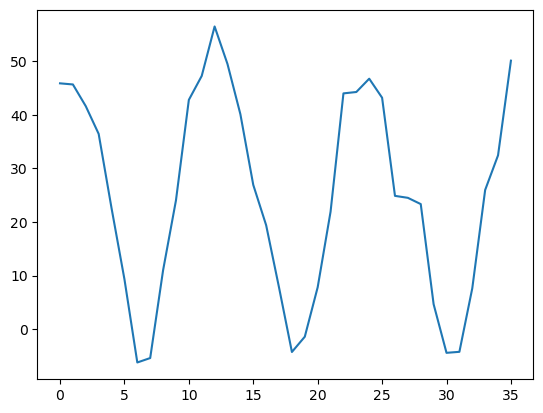

In [72]:
plt.plot(ts.values)